In [73]:
import os
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.image as mpimg
from torch.utils.data import Dataset
from torchvision import transforms, utils
import torchvision.transforms as transforms

# Input

In [74]:
class MNISTDataset(Dataset): 
    def __init__(self,root,train,transform): 
        self.transform = transform
        self.image_files = []
        if train:
            dic = 'training'
        else:
            dic = 'testing'
        for label in os.listdir(root+dic): 
            for r, _, f in os.walk(root+dic+'/'+label):
                for item in range(len(f)):
                    self.image_files.append((r+'/'+f[item],int(label)))

    def __getitem__(self, index):    
        img_name, label = self.image_files[index]
        img = mpimg.imread(img_name)
        img = self.transform(img)
        return[img,label]

    def __len__(self): 
        return len(self.image_files)

In [75]:
transform = transforms.Compose([transforms.ToTensor()])
img,label = MNISTDataset('mnist_png/mnist_png/',True,transform).__getitem__(5999)

In [76]:
# plt.figure()
# plt.imshow(img)

In [77]:
trainset = MNISTDataset('mnist_png/mnist_png/',train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True)

testset = MNISTDataset('mnist_png/mnist_png/',train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=True)

In [78]:
classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

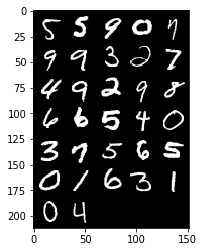

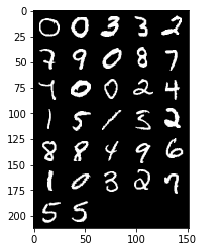

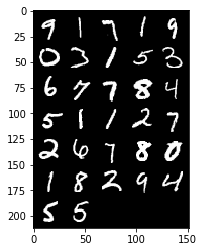

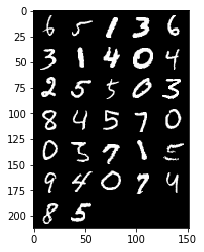

In [79]:
def show_batch(data):
    imgs,labels = data
    grid = utils.make_grid(imgs,nrow=5)
#     print(grid.numpy().shape)
#     print(grid.numpy().transpose((1, 2, 0)).shape)

    plt.figure()
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title('')

for i, data in enumerate(testloader):
    if(i<4):
        show_batch(data)
    else:
        break

# Net

In [80]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 100)
        self.fc3 = nn.Linear(100, 10)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        b,c,h,w = x.size()
        x = x.view(b,c*h*w)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

net = Net()

In [81]:
for p in enumerate(net.parameters()):
    print(p[1].size())

torch.Size([512, 784])
torch.Size([512])
torch.Size([100, 512])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


# Loss and optimizer

In [82]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training
https://www.runoob.com/python/python-func-enumerate.html

In [89]:
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        print(labels)
        print(outputs)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.10f' % (epoch+1 , i , running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

tensor([2, 5, 5, 7, 5, 5, 0, 8, 6, 5, 2, 5, 9, 1, 6, 3, 1, 1, 3, 9, 2, 4, 1, 1,
        9, 0, 6, 4, 4, 5, 2, 0])
tensor([[1.0897e-01, 3.3200e-03, 9.6826e-01, 3.5995e-04, 8.2699e-05, 4.5708e-04,
         9.5462e-01, 5.2531e-03, 7.9752e-03, 5.8661e-05],
        [6.7872e-06, 8.8004e-07, 7.8831e-04, 2.9469e-07, 9.9792e-01, 2.2990e-06,
         5.4159e-03, 2.8146e-03, 9.6502e-03, 9.9933e-01],
        [3.3870e-07, 1.1912e-03, 2.7427e-01, 2.5746e-05, 1.7127e-04, 4.7405e-04,
         9.9973e-01, 4.7391e-10, 4.7003e-03, 3.5447e-06],
        [4.6010e-05, 6.5695e-03, 9.9697e-01, 6.0234e-04, 5.1845e-08, 6.1093e-07,
         3.7761e-02, 4.3801e-07, 2.5820e-02, 3.1961e-08],
        [2.1616e-04, 3.4005e-08, 1.7402e-06, 2.2374e-07, 7.1934e-01, 1.7042e-03,
         6.9637e-04, 4.1497e-05, 1.8762e-02, 9.9779e-01],
        [7.6501e-05, 2.1283e-02, 5.1700e-04, 6.7920e-01, 1.7194e-04, 6.4586e-01,
         2.3323e-02, 5.4992e-06, 2.1260e-02, 4.7049e-04],
        [4.2457e-04, 1.0201e-04, 9.9938e-01, 4.7320e-

tensor([[2.2773e-04, 9.5857e-03, 8.7613e-03, 5.5071e-04, 3.4145e-07, 1.0828e-02,
         6.5076e-07, 7.0211e-04, 9.6279e-01, 1.0152e-05],
        [1.1764e-01, 1.0693e-05, 8.2080e-01, 1.0965e-06, 4.7439e-04, 1.4325e-02,
         9.9981e-01, 4.4359e-08, 5.8564e-02, 3.8198e-06],
        [8.7587e-05, 2.5476e-05, 5.9289e-06, 4.0707e-08, 7.8644e-04, 3.9130e-01,
         6.2413e-05, 9.5683e-07, 9.9939e-01, 2.8806e-03],
        [2.6478e-08, 9.9923e-01, 3.5654e-02, 2.8869e-03, 4.1631e-04, 8.6256e-05,
         1.0240e-03, 1.6757e-02, 3.4778e-02, 1.3678e-03],
        [1.4504e-10, 9.9995e-01, 6.9706e-03, 1.5035e-02, 4.7984e-05, 1.4345e-04,
         6.6910e-03, 1.9681e-03, 5.4443e-03, 3.8751e-04],
        [6.8635e-05, 2.0028e-02, 3.1162e-02, 2.7989e-01, 4.4787e-05, 1.8632e-05,
         9.6323e-07, 9.9971e-01, 1.5330e-03, 1.9195e-01],
        [1.1579e-02, 5.2686e-06, 1.2390e-08, 1.1370e-01, 7.6660e-03, 9.9967e-01,
         2.1426e-05, 6.8593e-05, 3.3900e-01, 5.0387e-01],
        [6.9367e-07, 9.9479

        6, 6, 1, 8, 3, 1, 9, 0])
tensor([[9.8792e-01, 4.7003e-08, 1.0793e-01, 4.4964e-02, 3.5881e-09, 3.7208e-02,
         6.4323e-08, 3.4294e-03, 3.9761e-01, 1.1588e-06],
        [1.4133e-02, 5.2578e-11, 6.7488e-11, 1.4311e-05, 1.4292e-06, 1.9126e-03,
         3.1428e-11, 9.9992e-01, 6.1797e-04, 9.0001e-01],
        [9.9986e-01, 8.9153e-15, 3.0404e-09, 2.5006e-05, 7.5725e-11, 8.3854e-01,
         3.0779e-06, 1.4999e-04, 1.9616e-07, 3.5670e-07],
        [9.9986e-01, 4.2262e-18, 2.2463e-06, 1.1537e-10, 1.9039e-11, 5.6514e-07,
         3.1962e-07, 8.0347e-02, 5.1552e-08, 1.0583e-06],
        [1.9399e-01, 7.9541e-09, 8.6568e-06, 7.1058e-01, 2.8195e-05, 6.2001e-01,
         1.4886e-06, 5.8292e-05, 2.1623e-01, 8.0291e-03],
        [2.0157e-04, 2.8152e-07, 8.6569e-04, 3.0681e-02, 1.0552e-07, 6.3176e-08,
         1.9467e-10, 1.0000e+00, 4.7006e-04, 2.9521e-02],
        [1.4571e-02, 4.5688e-06, 1.0313e-07, 1.5225e-02, 1.2261e-07, 9.9981e-01,
         1.0398e-06, 4.9112e-04, 2.5562e-02, 6.3898e

       grad_fn=<SigmoidBackward>)
tensor([1, 1, 2, 2, 9, 9, 4, 3, 0, 2, 0, 9, 2, 8, 1, 7, 8, 7, 1, 0, 6, 9, 0, 9,
        8, 3, 8, 2, 5, 2, 1, 3])
tensor([[1.5900e-07, 9.9945e-01, 2.1623e-02, 1.0200e-02, 7.7460e-05, 1.3623e-03,
         1.2372e-02, 3.8876e-03, 1.3292e-02, 2.5191e-04],
        [9.9991e-01, 1.8605e-13, 3.1918e-07, 3.3950e-03, 3.5370e-09, 8.0649e-01,
         1.8173e-06, 4.8632e-04, 1.6906e-05, 3.1925e-06],
        [4.7215e-06, 3.3741e-05, 2.7635e-07, 4.8615e-06, 9.9992e-01, 1.6166e-01,
         2.6180e-02, 9.9642e-05, 4.0778e-02, 9.9980e-01],
        [6.9855e-05, 4.4352e-09, 2.4658e-09, 1.0168e-06, 6.3314e-01, 1.3922e-03,
         1.5447e-05, 1.3416e-02, 6.9156e-04, 9.9953e-01],
        [2.8292e-06, 8.7600e-08, 3.4030e-07, 9.7590e-05, 1.0562e-01, 5.2695e-05,
         1.3790e-05, 9.9980e-03, 5.6406e-04, 9.9705e-01],
        [2.1595e-05, 5.0685e-04, 6.1678e-03, 5.1460e-04, 2.1663e-06, 2.8913e-03,
         1.6000e-08, 2.1902e-06, 9.9997e-01, 1.7711e-04],
        [9.1093e-06

        0, 1, 2, 7, 1, 2, 8, 7])
tensor([[4.4667e-02, 7.5416e-08, 1.3732e-08, 7.9615e-05, 5.7751e-04, 9.9982e-01,
         8.3068e-03, 9.7072e-07, 3.8111e-04, 2.7097e-03],
        [1.5351e-02, 1.4623e-04, 3.2727e-03, 5.2575e-06, 5.0856e-05, 8.1585e-01,
         9.9994e-01, 1.7523e-08, 8.0406e-04, 5.4328e-07],
        [2.9530e-06, 5.3708e-06, 9.9939e-01, 4.6562e-07, 1.1333e-01, 8.4306e-10,
         1.4795e-03, 4.4512e-08, 9.9710e-01, 2.3449e-02],
        [3.9560e-02, 7.6059e-07, 4.8245e-07, 9.0333e-04, 2.1905e-05, 9.9975e-01,
         2.1234e-05, 6.0427e-07, 6.4597e-01, 1.1177e-03],
        [9.2244e-07, 9.9717e-01, 3.0618e-01, 1.3011e-02, 3.1686e-04, 8.8344e-04,
         2.0842e-03, 2.8544e-04, 7.8998e-01, 3.1706e-04],
        [9.9880e-01, 1.2644e-11, 1.5840e-03, 7.3656e-04, 5.6993e-07, 8.8041e-02,
         5.9141e-01, 3.3638e-06, 6.9546e-05, 5.3166e-06],
        [4.7094e-03, 3.4457e-03, 2.1618e-01, 3.0733e-05, 7.5191e-04, 5.0549e-03,
         4.4373e-04, 1.0759e-04, 9.9822e-01, 6.1413e

       grad_fn=<SigmoidBackward>)
tensor([6, 8, 2, 9, 2, 0, 3, 2, 1, 1, 1, 3, 6, 1, 0, 6, 8, 1, 0, 6, 9, 5, 2, 4,
        1, 1, 2, 8, 4, 0, 8, 4])
tensor([[8.2889e-05, 6.9638e-08, 8.9065e-03, 1.2375e-08, 2.0407e-01, 1.0156e-08,
         8.9056e-06, 5.0669e-01, 1.4159e-02, 9.9494e-01],
        [5.4243e-05, 1.8889e-04, 1.0000e+00, 7.4206e-01, 1.4220e-10, 1.8368e-07,
         1.6322e-02, 9.5228e-12, 1.1224e-01, 1.1489e-11],
        [3.2765e-05, 3.1652e-06, 1.9696e-06, 1.0396e-05, 1.2719e-04, 1.0986e-05,
         7.7371e-09, 9.9906e-01, 2.5267e-04, 9.1362e-01],
        [6.4698e-08, 9.9956e-01, 8.0911e-03, 5.3607e-03, 5.0490e-06, 3.8248e-02,
         2.4339e-02, 1.6827e-05, 4.6058e-01, 8.8386e-06],
        [9.9913e-01, 2.5745e-13, 2.5222e-03, 4.9946e-06, 3.1952e-10, 8.6895e-04,
         4.1764e-04, 1.2048e-07, 1.6796e-03, 8.1309e-09],
        [7.8872e-06, 1.5038e-08, 3.1251e-03, 9.8746e-12, 1.2105e-04, 1.0736e-06,
         9.9996e-01, 9.2213e-12, 1.0519e-03, 2.1553e-06],
        [6.3992e-05

tensor([[3.3882e-05, 1.5414e-09, 7.1679e-05, 3.1697e-07, 9.9848e-01, 1.6434e-04,
         9.7845e-04, 1.0306e-06, 5.2309e-01, 9.9885e-01],
        [1.1365e-05, 1.7364e-05, 3.1012e-03, 3.6321e-03, 2.4342e-08, 8.5814e-08,
         1.7965e-10, 1.0000e+00, 4.0701e-04, 1.1473e-02],
        [1.3487e-01, 5.2043e-10, 2.5589e-02, 1.7800e-07, 4.6336e-04, 1.5832e-03,
         9.9999e-01, 3.5816e-08, 5.2073e-07, 1.6858e-05],
        [1.8401e-06, 1.9659e-05, 2.2802e-02, 3.2255e-08, 7.1552e-03, 3.5359e-06,
         9.9966e-01, 1.1987e-07, 3.2615e-04, 6.3996e-04],
        [4.1285e-02, 3.9852e-06, 7.3606e-08, 1.0909e-04, 6.4979e-05, 9.9992e-01,
         4.4329e-01, 1.3074e-07, 1.0873e-02, 1.0941e-04],
        [2.6328e-02, 2.0983e-04, 6.4586e-02, 2.8347e-04, 7.0614e-07, 6.9853e-01,
         9.9841e-01, 1.7353e-08, 3.9236e-03, 6.6385e-08],
        [8.1532e-06, 9.9078e-01, 5.7465e-02, 2.8544e-02, 2.9348e-07, 4.4417e-02,
         1.2984e-02, 1.5976e-05, 2.0316e-01, 5.6001e-07],
        [3.9955e-05, 2.8100

tensor([[9.9845e-01, 1.1238e-12, 1.6104e-02, 3.9134e-04, 2.7923e-10, 1.8143e-03,
         4.4008e-06, 5.5652e-06, 1.3654e-02, 1.2796e-07],
        [3.7382e-08, 9.9679e-01, 6.6104e-02, 9.1618e-04, 1.6465e-03, 8.9751e-06,
         8.9085e-04, 2.3909e-01, 8.9553e-03, 9.0420e-03],
        [2.8691e-03, 2.1790e-05, 2.2116e-04, 7.4853e-05, 9.8289e-01, 1.5414e-02,
         1.0239e-01, 1.4624e-02, 3.2884e-02, 9.8691e-01],
        [2.2925e-06, 1.3269e-06, 3.6940e-04, 3.9398e-08, 1.4912e-02, 1.4479e-03,
         1.0000e+00, 5.5758e-12, 4.4052e-03, 1.6107e-04],
        [7.4983e-07, 3.8197e-02, 1.3298e-06, 2.6841e-03, 1.3983e-01, 2.2195e-02,
         3.0181e-05, 3.2533e-01, 3.7494e-02, 9.8819e-01],
        [3.6766e-03, 1.9539e-08, 6.3020e-02, 3.7427e-06, 2.2559e-01, 1.9267e-08,
         9.2549e-07, 8.6508e-01, 6.8678e-02, 9.9750e-01],
        [9.4513e-06, 1.9763e-07, 5.4282e-08, 6.0286e-04, 9.6333e-01, 9.2399e-02,
         1.3680e-03, 1.5832e-05, 3.6679e-02, 9.9958e-01],
        [2.3693e-07, 3.1054

tensor([[9.9993e-01, 1.4032e-14, 1.0942e-04, 8.6807e-09, 1.5559e-09, 7.5792e-01,
         9.2399e-01, 2.2387e-12, 1.0852e-03, 5.8054e-11],
        [2.0995e-06, 6.0021e-02, 9.9703e-01, 8.4422e-03, 1.9729e-04, 1.0340e-07,
         1.6432e-03, 4.0721e-03, 1.2336e-02, 5.8559e-04],
        [6.3996e-03, 2.8699e-09, 5.7732e-07, 1.0895e-04, 2.4956e-10, 2.7303e-06,
         4.5937e-12, 1.0000e+00, 3.5814e-04, 1.3944e-03],
        [2.0104e-06, 1.7695e-02, 5.5478e-03, 1.6758e-07, 9.5572e-01, 1.3266e-04,
         2.1163e-03, 2.3458e-04, 9.4024e-01, 7.0941e-01],
        [2.3714e-05, 9.7956e-01, 5.2406e-06, 7.2917e-02, 1.6508e-04, 9.9984e-01,
         5.6998e-03, 9.1705e-07, 9.2070e-01, 7.4873e-05],
        [3.3645e-07, 9.9918e-01, 3.8404e-02, 1.1279e-02, 2.2278e-04, 9.7271e-04,
         4.2614e-03, 1.0991e-02, 4.1905e-02, 7.5880e-04],
        [1.5773e-03, 5.3909e-06, 4.4050e-03, 4.9749e-03, 1.4718e-08, 1.3735e-06,
         4.7695e-10, 9.9999e-01, 1.1544e-03, 2.4154e-03],
        [2.7117e-03, 3.0069

tensor([[9.9814e-01, 1.7727e-09, 2.8436e-01, 6.3476e-09, 5.7260e-10, 3.1612e-05,
         1.7303e-01, 5.6854e-03, 1.6933e-04, 1.1926e-08],
        [1.1182e-03, 1.7091e-10, 9.7115e-04, 1.2569e-11, 4.6607e-04, 1.6823e-06,
         9.9998e-01, 5.1190e-09, 7.6214e-07, 3.7080e-05],
        [7.4733e-06, 5.9154e-04, 9.9999e-01, 1.7795e-06, 4.8366e-07, 1.2839e-08,
         4.0570e-01, 5.3991e-08, 5.9099e-02, 6.3748e-09],
        [5.0874e-06, 2.9475e-02, 9.9689e-01, 2.4096e-02, 2.4880e-17, 2.1915e-04,
         1.0175e-03, 1.1918e-08, 9.3751e-04, 1.9845e-16],
        [3.8325e-06, 6.8621e-07, 7.4342e-07, 1.4192e-07, 1.0433e-01, 1.9371e-06,
         7.6778e-09, 9.6538e-01, 1.2866e-02, 9.9488e-01],
        [2.0145e-06, 2.3931e-04, 1.1883e-07, 3.9883e-03, 6.4973e-02, 2.8494e-02,
         2.0706e-06, 2.5716e-01, 4.9864e-02, 9.9224e-01],
        [9.9986e-01, 5.9974e-13, 4.2564e-05, 1.3410e-07, 8.7935e-15, 8.9879e-01,
         1.4365e-03, 2.7847e-10, 2.1622e-03, 1.2721e-13],
        [7.4105e-06, 2.1338

        2, 4, 4, 5, 1, 3, 4, 6])
tensor([[1.4378e-02, 1.7604e-10, 2.4954e-04, 5.3622e-03, 1.0536e-12, 3.4256e-08,
         5.3960e-15, 1.0000e+00, 9.9303e-04, 2.2335e-04],
        [9.5172e-02, 5.7099e-03, 6.6437e-02, 2.4223e-04, 1.4657e-06, 8.3329e-01,
         9.9971e-01, 1.8491e-08, 5.1701e-02, 3.7093e-08],
        [6.7085e-05, 1.6765e-04, 1.1204e-02, 3.1788e-04, 8.0227e-01, 7.2419e-06,
         1.0527e-03, 2.8218e-01, 2.7266e-02, 9.9610e-01],
        [7.7309e-02, 1.8901e-07, 5.6224e-04, 1.6929e-04, 9.5532e-04, 3.7600e-01,
         9.9576e-01, 3.1665e-08, 1.8736e-04, 1.4504e-04],
        [1.6385e-04, 3.8945e-08, 5.9637e-03, 7.0430e-01, 1.2257e-03, 3.5821e-06,
         5.3956e-07, 7.2258e-01, 2.9516e-05, 8.9212e-01],
        [4.4283e-04, 6.6164e-09, 9.9766e-01, 3.7629e-03, 3.4940e-05, 2.7380e-10,
         3.0477e-06, 5.0800e-04, 3.5088e-04, 1.0663e-02],
        [2.0797e-07, 9.9936e-01, 9.1402e-02, 6.4010e-03, 1.1482e-03, 1.3017e-02,
         1.2067e-03, 1.5711e-05, 9.9441e-01, 2.0688e

        0, 6, 0, 5, 9, 9, 8, 7])
tensor([[1.3515e-03, 6.4012e-05, 9.8435e-04, 3.0058e-06, 1.0119e-05, 6.8122e-01,
         2.8218e-05, 9.6962e-08, 9.9994e-01, 2.7508e-05],
        [9.6606e-01, 8.5992e-10, 4.3335e-04, 1.2154e-02, 2.3485e-10, 1.4572e-03,
         2.6119e-08, 3.7325e-02, 8.3648e-04, 3.9089e-06],
        [3.0224e-05, 1.9555e-06, 9.7763e-05, 5.7814e-04, 5.7202e-01, 8.6008e-06,
         2.3745e-06, 1.3111e-01, 3.8056e-02, 9.9731e-01],
        [3.3578e-09, 9.3134e-01, 3.3937e-06, 6.5067e-04, 6.2881e-01, 5.0196e-02,
         6.6263e-02, 3.7124e-05, 3.1840e-02, 8.3811e-01],
        [3.5293e-06, 1.2755e-08, 9.9999e-01, 1.0578e-05, 2.7972e-14, 1.1415e-10,
         6.7888e-09, 1.3300e-09, 9.9091e-01, 1.0382e-12],
        [2.1769e-02, 4.2595e-10, 6.9468e-05, 2.5073e-06, 1.6868e-05, 1.3740e-02,
         9.6674e-01, 2.3360e-09, 1.4206e-05, 2.8667e-05],
        [9.9936e-01, 3.2701e-11, 2.5076e-04, 2.4691e-01, 1.9150e-09, 2.2385e-02,
         1.6503e-08, 7.1506e-02, 2.9025e-03, 3.3502e

        2, 6, 2, 1, 8, 5, 5, 0])
tensor([[6.3669e-05, 2.7636e-06, 6.9731e-04, 3.0304e-04, 3.2035e-07, 4.2313e-07,
         1.1027e-09, 9.9996e-01, 8.2221e-04, 1.1285e-01],
        [2.7617e-06, 1.3142e-03, 1.1495e-07, 3.6171e-04, 1.7697e-02, 1.4289e-02,
         1.4278e-06, 9.5832e-01, 3.2781e-02, 9.8953e-01],
        [2.0679e-06, 4.5564e-07, 2.5956e-02, 1.0000e+00, 7.4854e-12, 8.5714e-04,
         3.6797e-05, 9.4457e-09, 2.3804e-07, 2.0624e-09],
        [5.2823e-07, 9.1280e-01, 9.8949e-03, 7.2038e-01, 5.6661e-03, 5.9692e-01,
         2.5316e-02, 8.0298e-05, 1.9632e-01, 7.1890e-03],
        [9.9991e-01, 1.2176e-16, 3.8722e-06, 2.4535e-05, 1.6730e-09, 1.3545e-03,
         9.5364e-11, 1.8798e-03, 3.9261e-03, 2.9823e-04],
        [4.8866e-06, 2.8270e-04, 1.2378e-03, 3.8286e-07, 1.2693e-04, 1.3250e-03,
         1.2123e-05, 3.4712e-07, 9.9998e-01, 1.6781e-03],
        [1.3885e-04, 1.5549e-10, 8.0344e-05, 1.4812e-04, 9.9851e-01, 3.1048e-05,
         1.2710e-03, 6.7551e-06, 4.7340e-03, 9.9991e

KeyboardInterrupt: 

# Save Weight

In [ ]:
w_path = './w_mnist_net.pth'
m_path = './m_mnist_net.pth'
# torch.save(net.state_dict(), w_path)
# torch.save(net, m_path)

# Load Weight

In [84]:
net = Net()
net.load_state_dict(torch.load(w_path))

<All keys matched successfully>

# Testing
https://www.runoob.com/python/python-func-iter.html
torch.max(input, dim, keepdim=False, out=None)

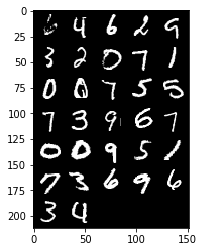

In [85]:
dataiter = iter(testloader)
data = dataiter.next()
images, labels = data
show_batch(data)

In [86]:
outputs = net(images)
outputs.size()

torch.Size([32, 10])

In [87]:
_, predicted = torch.max(outputs, 1)
print(_)
print(predicted)

tensor([0.9683, 0.9993, 0.9997, 0.9970, 0.9978, 0.6792, 0.9994, 0.9925, 1.0000,
        0.9998, 0.9998, 0.9999, 0.9998, 0.9857, 0.8522, 0.9996, 1.0000, 0.9595,
        0.9992, 0.9969, 0.9991, 1.0000, 0.9994, 0.8869, 0.9620, 0.9830, 0.9946,
        1.0000, 0.9998, 0.9996, 1.0000, 0.4335], grad_fn=<MaxBackward0>)
tensor([2, 9, 6, 2, 9, 3, 2, 0, 7, 1, 0, 0, 7, 5, 5, 7, 3, 9, 6, 7, 0, 0, 9, 3,
        1, 7, 3, 6, 9, 6, 3, 9])


In [88]:
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(32)))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(32)))

GroundTruth:      6     4     6     2     9     3     2     0     7     1     0     0     7     5     5     7     3     9     6     7     0     0     9     5     1     7     3     6     9     6     3     4
Predicted:      2     9     6     2     9     3     2     0     7     1     0     0     7     5     5     7     3     9     6     7     0     0     9     3     1     7     3     6     9     6     3     9


In [ ]:
correct = 0
total = 10000
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)      
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
# class_correct = list(0. for i in range(10))
# class_total = list(0. for i in range(10))
# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = net(images)
#         _, predicted = torch.max(outputs, 1)
#         c = (predicted == labels).squeeze()
#         for i in range(4):
#             label = labels[i]
#             class_correct[label] += c[i].item()
#             class_total[label] += 1

# for i in range(10):
#     print('Accuracy of %5s : %2d %%' % (
#         classes[i], 100 * class_correct[i] / class_total[i]))